### Preindex ### 
* Read system dictionary with 5 letter words

In [13]:
dict_file = '/usr/share/dict/words'
word_len = 5
with open(dict_file, 'r') as file:
    d = [line.strip() for line in file.readlines() if line.islower() and len(line) == word_len+1]
print("%d entries in dictionary" % len(d))

8497 entries in dictionary


In [14]:
def evaluate(word, guess):
    assert(len(word) == len(guess))
    ans = []
    word_set = [c for c in word]    
    for (w, g) in zip(word, guess):
        if w==g:
            ans.append(1)
            word_set.remove(g)
        elif g not in word:
            ans.append(None)
        else:
            ans.append(0)
    for i, e in enumerate(ans):
        if e == 0:
            if guess[i] in word_set:
                word_set.remove(guess[i])
            else:
                ans[i] = None
    
    return ans

def is_correct(ans):
    return all([x == 1 for x in ans])

In [15]:
ans = evaluate('soale', 'abbot')
print(ans)
print(is_correct(ans))
ans = evaluate('acari', 'acara')
print(ans)
print(is_correct(ans))


[0, None, None, 0, None]
False
[1, 1, 1, 1, None]
False


In [16]:
import re
def get_candidates(pad, dictionary):
    regxp = ''
    for p in pad:
        regxp += ('[' + ''.join(p) + ']')

    # print(regxp)
    words = []
    for word in dictionary:
        if re.match(regxp, word):
            words.append(word)

    return words

In [17]:
from collections import defaultdict
import heapq

def get_best_candidate(words):
    c = defaultdict(int)
    for word in words:
        for (i, e) in enumerate(word):
            c[(i, e)] += 1

    h = []    
    for word in words:
        score = 0
        for (i, e) in enumerate(word):
            score += c[(i, e)]   
        heapq.heappush(h, (-score, word))


    return h[0][1]

In [18]:
def solve(word, start_word):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    pad = [set(alphabet) for i in range(word_len)]
    # print(pad)

    guess = start_word
    attempts = 0
    while True:
        attempts += 1 
        ans = evaluate(word, guess)
        # print(guess, ans)
        if is_correct(ans):
            return attempts
            print('word is %s after %d attempts' % (guess, attempts))
            break 

        seen = set()
        for (i, e) in enumerate(ans):
            if e == 1:
                pad[i] = set(guess[i])
                seen.add(guess[i])
            elif e == 0:
                pad[i].discard(guess[i])
                seen.add(guess[i])
            else: #none
                if guess[i] in seen:
                    pad[i].discard(guess[i])
                else:
                    for p in pad: 
                        p.discard(guess[i]) 

        #print(pad)
        words = get_candidates(pad, d)
        guess = get_best_candidate(words)
        #print(word, words, guess)


In [19]:
solve('slump', 'soare')

6

In [20]:
start_word = 'soare'
c = defaultdict(int)
i = 0
for word in d[:400]:
    i += 1
#    print(word)
    attempts = solve(word, start_word)
    c[attempts] += 1
    if i%500 == 0:
        print(c)
    if attempts > 6: 
        print(word, attempts)
print(c)

abler 9
acold 7
adrip 7
adzer 7
after 7
agape 7
agger 8
aglow 7
agony 7
amelu 7
amhar 7
amino 7
among 7
angle 7
angor 7
ankle 7
anvil 7
apart 7
aping 7
defaultdict(<class 'int'>, {4: 114, 5: 168, 6: 73, 3: 25, 9: 1, 7: 17, 8: 1, 2: 1})


<BarContainer object of 8 artists>

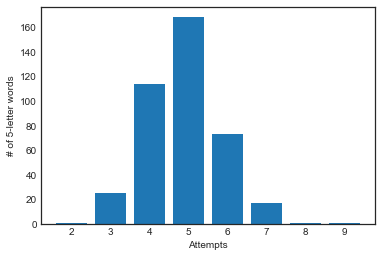

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.xlabel('Attempts')
plt.ylabel('# of 5-letter words')
plt.bar(c.keys(), c.values())
